In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import string 
string.punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import re
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from nltk.tokenize import word_tokenize
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("E:\\Local Disk G\\11th Semester\\CSE475\\Twitter Diseaster Dataset\\train.csv")

In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"

In [5]:
def tweets_cleaning(text):
    lowercase = text.lower()
    punc_removal = [char for char in lowercase if char not in string.punctuation]
    punc_removal_joined = ''.join(punc_removal)
    url_removal = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', punc_removal_joined, flags=re.MULTILINE)
    for emoji in EMOJIS.keys():
        url_removal = url_removal.replace(emoji, "EMOJI" + EMOJIS[emoji])  
   # emoji_removal = url_removal.encode('ascii', 'ignore').decode('ascii')
    emoji_removal=url_removal
    stopwords_removal = [word for word in emoji_removal.split() if word not in stopwords.words('english')]
    return stopwords_removal

In [6]:
df_train['cleaned_text']=df_train['text'].apply(tweets_cleaning).astype(str)


In [7]:
df_train_clean=df_train[['cleaned_text','target']]
df_train_clean.head()

,cleaned_text,target
0,"['deeds', 'reason', 'earthquake', 'may', 'alla...",1
1,"['forest', 'fire', 'near', 'la', 'ronge', 'sas...",1
2,"['residents', 'asked', 'shelter', 'place', 'no...",1
3,"['13000', 'people', 'receive', 'wildfires', 'e...",1
4,"['got', 'sent', 'photo', 'ruby', 'alaska', 'sm...",1


In [8]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_train_clean['cleaned_text'].values)
X = tokenizer.texts_to_sequences(df_train_clean['cleaned_text'].values)
X = pad_sequences(X)

In [9]:
embed_dim = 128
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
Y = df_train_clean['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6090, 18) (6090,)
(1523, 18) (1523,)


In [11]:
Y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
7583    1
7584    0
7585    1
7586    1
7587    0
7588    1
7589    1
7590    1
7591    1
7592    1
7593    0
7594    1
7595    1
7596    1
7597    1
7598    1
7599    1
7600    1
7601    1
7602    1
7603    1
7604    1
7605    1
7606    1
7607    1
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [12]:
batch_size = 16
model.fit(X_train, Y_train, epochs = 19, batch_size=batch_size,validation_split=0.3, verbose = 2)


Train on 4263 samples, validate on 1827 samples
Epoch 1/19
 - 6s - loss: 0.5287 - acc: 0.7363 - val_loss: 0.4734 - val_acc: 0.7811
Epoch 2/19
 - 5s - loss: 0.3640 - acc: 0.8403 - val_loss: 0.5005 - val_acc: 0.7657
Epoch 3/19
 - 5s - loss: 0.2989 - acc: 0.8733 - val_loss: 0.5380 - val_acc: 0.7646
Epoch 4/19
 - 5s - loss: 0.2266 - acc: 0.9087 - val_loss: 0.6320 - val_acc: 0.7537
Epoch 5/19
 - 5s - loss: 0.1810 - acc: 0.9289 - val_loss: 0.7335 - val_acc: 0.7307
Epoch 6/19
 - 5s - loss: 0.1384 - acc: 0.9463 - val_loss: 0.9025 - val_acc: 0.7449
Epoch 7/19
 - 6s - loss: 0.1163 - acc: 0.9538 - val_loss: 1.0059 - val_acc: 0.7345
Epoch 8/19
 - 5s - loss: 0.1010 - acc: 0.9587 - val_loss: 1.1845 - val_acc: 0.7252
Epoch 9/19
 - 5s - loss: 0.0820 - acc: 0.9662 - val_loss: 1.3240 - val_acc: 0.7340
Epoch 10/19
 - 5s - loss: 0.0696 - acc: 0.9700 - val_loss: 1.4652 - val_acc: 0.7307
Epoch 11/19
 - 5s - loss: 0.0593 - acc: 0.9756 - val_loss: 1.5717 - val_acc: 0.7252
Epoch 12/19
 - 5s - loss: 0.0540 - a

Accuracy using LSTM:  72.7 %
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       874
           1       0.68      0.68      0.68       649

    accuracy                           0.73      1523
   macro avg       0.72      0.72      0.72      1523
weighted avg       0.73      0.73      0.73      1523

[[667 207]
 [209 440]]


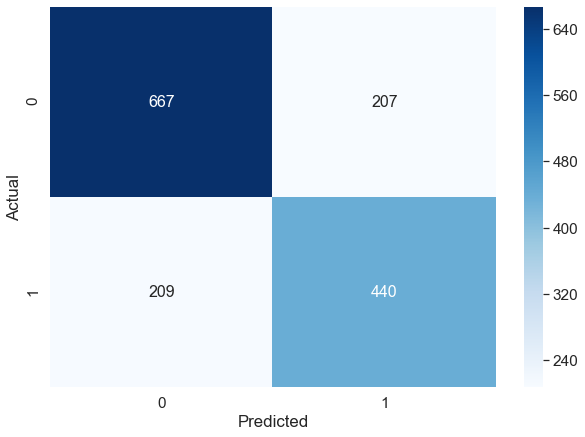

In [14]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")
score = accuracy_score(Y_test, y_pred) * 100
print("Accuracy using LSTM: ", round(score, 1), "%" )
print(classification_report(Y_test, y_pred))
data = metrics.confusion_matrix(Y_test, y_pred)
print(data)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [156]:
df_test = pd.read_csv("E:\\Local Disk G\\11th Semester\\CSE475\\Twitter Diseaster Dataset\\test.csv",usecols=['text','id'])
df_test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [168]:
df_test['cleaned_text']=df_test['text'].apply(tweets_cleaning).astype(str)


In [164]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_test['cleaned_text'].values)
X_test_set = tokenizer.texts_to_sequences(df_test['cleaned_text'].values)
X_test_set = pad_sequences(X_test_set)

In [169]:
y_test_pred = (model.predict(X_test_set) >= 0.5).astype("int")

In [170]:
df_test["target"]=y_test_pred

In [172]:
df_test.to_csv('E:\\Local Disk G\\11th Semester\\CSE475\\Twitter Diseaster Dataset\\testpredict2.csv', index=False)